In [2]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt

In [3]:
class NeuralNet():
    '''
    This class contains methods/functions for the basic implementation
    of a neural network from scratch. We use batch gradient descent
    to update the weights and optimize our weights.
    '''

    def __init__(self, W1, b1, W2, b2, X, y, cost_vec):

        self.W1 = W1
        self.b1 = b1
        self.W2 = W2
        self.b2 = b2
        self.X = X
        self.y = y
        #self.out = out
        self.cost_vec = cost_vec

    def sigmoid(self, t):

        return 1 / (1 + np.exp(-t))

    def cost_funtion(self, out, reg_lambda):
        
        #cost = np.mean(np.square(self.y - self.out))
        cost = 0
        cost += np.mean(np.square(out - self.y))
        #print("Cost: {0}".format(cost))
        cost += (reg_lambda / 2) * (np.sum(np.square(self.W1)) + np.sum(np.square(self.W2)))
        
        #exp_scores = np.exp(out)
        #probs = out / np.sum(out, axis=0, keepdims=True)
        #print("Probs : {0}".format(probs))
        # Calculating the loss
        #corect_logprobs = - np.log(probs)
        #print("corect logProbs : {0}".format(corect_logprobs))
        #cost = np.sum(corect_logprobs)
        #print("Cost : {0}".format(cost))
        # Add regulatization term to loss (optional)
        #cost += reg_lambda / 2 * (np.sum(np.square(self.W1)) + np.sum(np.square(self.W2)))
        return cost
    
    def predict(self, XX):
        #print("Trained wts and biases are: {0} \n {1} \n {2} \n {3}".format(self.W1, self.b1, self.W2, self.b2))
        a1 = XX
        print("Shape of a1: {0}".format(a1.shape))
        print("Shape of W1: {0}".format(self.W1.shape))
        print("Shape of b1: {0}".format(self.b1.shape))
        z2 = np.dot(a1, self.W1) + self.b1.T
        print("Shape of z2: {0}".format(z2.shape))
        a2 = self.sigmoid(z2)
        print("Shape of a2: {0}".format(a2.shape))
        print("Shape of W2: {0}".format(self.W2.shape))
        print("Shape of b2: {0}".format(self.b2.shape))
        z3 = np.dot(a2, self.W2) + self.b2.T
        print("Shape of z3: {0}".format(z3.shape))
        a3 = self.sigmoid(z3)
        print("Shape of a3: {0}".format(a3.shape))
        print("Input given for prediction: {0}".format(XX))
        print("Actual output for prediction: {0}".format(self.y))
        print("Scaled result of prediction: {0}".format(a3))
        
    def build_network(self, epochs = 1000, alpha = 0.001, reg_lambda = 0.01, print_verbose = False):

        # steps for gradient descent
        for epoch in range(epochs):

            delW1 = np.zeros(self.W1.shape)
            delW2 = np.zeros(self.W2.shape)
            delb1 = np.zeros(self.b1.shape)
            delb2 = np.zeros(self.b2.shape)
            
            # feedforward pass
            a1 = self.X
            #print("Shape of a1: {0}".format(a1.shape))
            z2 = np.dot(a1, self.W1) + self.b1.T
            #print("Shape of z2: {0}".format(z2.shape))
            a2 = self.sigmoid(z2)
            #print("Shape of a2: {0}".format(a2.shape))
            z3 = np.dot(a2, self.W2) + self.b2.T
            #print("Shape of z3: {0}".format(z3.shape))
            a3 = self.sigmoid(z3)
            #print("Shape of a3: {0}".format(a3.shape))
            out = a3

            #backpropagation
            del3 = (out - self.y) * (a3 *(1 - a3))
            #print("Shape of del3: {0}".format(del3.shape))
            del2 = np.dot(del3, self.W2.T) * (a2 *(1 - a2))
            #print("Shape of del2: {0}".format(del2.shape))

            delJ_W2 = np.dot(a2.T, del3)
            #print("Shape of delJ_W2: {0}".format(delJ_W2.shape))
            delJ_b2 = np.sum(del3, axis = 0, keepdims = True)
            #print("Shape of delJ_b2: {0}".format(delJ_b2.shape))
            delJ_W1 = np.dot(a1.T, del2)
            #print("Shape of delJ_W1: {0}".format(delJ_W1.shape))
            delJ_b1 = np.sum(del2, axis = 0, keepdims = True)
            #print("Shape of delJ_b1: {0}".format(delJ_b1.shape))

            delW1 += delJ_W1
            delb1 += delJ_b1.T
            delW2 += delJ_W2
            delb2 += delJ_b2.T
            
            '''
            self.W1 += delJ_W1
            self.W2 += delJ_W2
            self.b1 += delJ_b1
            self.b2 += delJ_b2
            '''
            # recalculating weights
            
            m = self.X.shape[0]
            self.W1 += -alpha * ((1 / m * delW1) + reg_lambda * self.W1)
            self.b1 += -alpha * (1 / m * delb1)
            self.W2 += -alpha * ((1 / m * delW2) + reg_lambda * self.W2)
            self.b2 += -alpha * (1 / m * delb2)
            
            curr_cost = self.cost_funtion(out, reg_lambda)
            #print("Cost function in iteration: {0} is: {1}".format(epoch, curr_cost))
            #print("Cost vector is: {0}".format(self.cost_vec.shape))
            self.cost_vec[0, epoch] = curr_cost
            if print_verbose:
                print("Iteration: {0}, Loss: {1}".format(epoch, self.cost_vec[0, epoch]))
            #if epoch == epochs - 1:
            #    print("The prediction of the netowrk is: {0}".format(out))

[[0.08924993 0.08924803 0.08924613 ... 0.0141869  0.01418689 0.01418688]]
Shape of a1: (5, 2)
Shape of W1: (2, 3)
Shape of b1: (3, 1)
Shape of z2: (5, 3)
Shape of a2: (5, 3)
Shape of W2: (3, 1)
Shape of b2: (1, 1)
Shape of z3: (5, 1)
Shape of a3: (5, 1)
Input given for prediction: [[-0.75482941  1.22474487]
 [-1.29399328 -1.4969104 ]
 [-0.21566555 -0.81649658]
 [ 0.86266219  0.54433105]
 [ 1.40182605  0.54433105]]
Actual output for prediction: [[0.75]
 [0.62]
 [0.84]
 [0.9 ]
 [0.95]]
Scaled result of prediction: [[0.80083954]
 [0.78695832]
 [0.79617967]
 [0.8068829 ]
 [0.80951973]]


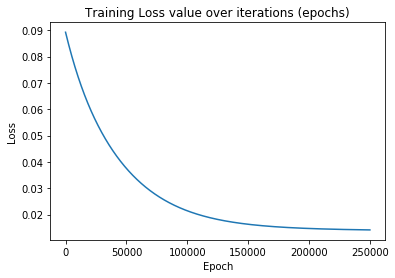

In [5]:
def main():

    # Each row is a training example, each column is a feature  [X1, X2, X3]
    #X = np.array(([1,0,1],[0,1,1],[1,0,1],[1,1,1]), dtype = float)
    #y = np.array(([0],[1],[1],[0]), dtype=float)
    # X = (hours studying, hours sleeping), y = score on test, xPredicted = 4 hours studying & 8 hours sleeping (input data for prediction)
    X = np.array(([2, 9], [1, 5], [3, 6], [5,8], [6,8]), dtype=float)
    y = np.array(([75], [62], [84], [90], [95]), dtype=float)
    

    XX = np.array(([4, 7]), dtype = float)
    #print("XX shape: {0}".format(XX.shape))
    #print("XX mean: {0}".format(np.std(XX, axis = 0)))
    #xPredicted = np.array(([4, 8]), dtype=float)

    # scale units
    #print("X mean: {0}".format(np.mean(X, axis = 0)))
    X = (X - np.mean(X, axis = 0))/ np.std(X, axis=0)  # maximum of X array
    
    #xPredicted = xPredicted / np.amax(xPredicted, axis=0)  # maximum of xPredicted (our input data for the prediction)
    y = y / 100  # max test score is 100
    XX = (XX - np.mean(XX, axis = 0))/ np.std(XX, axis=0)
    #print("Scaled XX: {0}".format(XX))
    num_hidden = 3
    
    #print("Shape of X: {0}".format(X.shape))
    np.random.seed(0)
    W1 = np.random.randn(X.shape[1], num_hidden)
    b1 = np.random.randn(num_hidden, 1)
    #b1 = np.zeros((num_hidden, 1))
    W2 = np.random.randn(num_hidden, y.shape[1])
    b2 = np.random.randn(y.shape[1], 1)
    #b2 = np.zeros((y.shape[1], 1))

    #print("W1 is: {0}".format(W1))
    #print("b1 is: {0}".format(b1))
    #print("W2 is: {0}".format(W2))
    #print("b2 is: {0}".format(b2))
    
    #print("Shape of y: {0}".format(y.shape))
    
    #out = np.zeros(y.shape)
    epochs = 250000
    
    cost_vec = np.zeros((1, epochs))

    nn = NeuralNet(W1, b1, W2, b2, X, y, cost_vec)
    nn.build_network(epochs = epochs)
    
    print(cost_vec)
    
    nn.predict(X)
    
    plt.plot(range(epochs), cost_vec[0, :])
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Training Loss value over iterations (epochs)")
    plt.show()

if __name__ == '__main__':
    main()
